#  Basic Analysis of the Iris Data set Using KNN in Python. 

## Introduction

 Machine learning becomes interesting not by reading theories only but implementing and trying out projects no matter how small the task may be with whatever you have learnt. You have the right article if you have been looking for how to implement a machine learning algorithm. This article contains:


- About KNN
- About Iris Dataset
- Understanding the dataset
- Exploratory Analysis
- Building Model
- Making Prediction

### About Iris Dataset

The Iris flower data is a multivariate data set introduced by the British statistician and biologist **Ronald Fisher** in his 1936 paper. The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis . It is sometimes called **Anderson’s** Iris data set because **Edgar Anderson** collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the *Gaspé Peninsula* “all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus”.The data set consists of 50 samples from each of three species of Iris *(Iris setosa, Iris virginica and Iris versicolor)*. Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

### About K-Nearest Neighbours

The K-Nearest Neighbours algorithm (K-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether K-NN is used for classification or regression:

In K-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In K-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.
K-NN is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until classification. The K-NN algorithm is among the simplest of all machine learning algorithms which is why I chose it for this tutorial. So if you're new or you've been confused about which algorithm you should start with, this is a good one for a start.

--------------------------------------------------------------------------------------------------------------------------------

The data set contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters called **independent features**. These are are called independednt features because they are the likely causative factors for our predictions to be possible. The fifth column is the species of the flower observed called **target or dependent feature**. This is called the dependent feature because it depends on the other features (i.e independent features), which means, independent feature determines the dependent feature. All observed flowers belong to one of three species.

**Let's get started by importing the packages you'll need** 

In [3]:
#importing packages
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


Don't worry too much about all of the packages, you'll see the the use as you go on.


The next thing you're doing  is reading the csv file by storing it first into a variable(that you'll continue to use on in this tutorial). You are going to use the pandas package which you imported as **pd**. **"pd"** is a common alias for pandas package.

In [4]:
data = pd.read_csv('iris.csv')

Now you view the dataset by calling the stored variable **data**

In [5]:
data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


### Understanding the Dataset

To understand the dataset you have to check information that can be easily deduced from the data in its raw form.
Now check the first 10 random observations to see what they entail

In [6]:
#Checking for random observation
data.sample(10)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
22,5.1,3.3,1.7,0.5,Iris-setosa
139,6.7,3.1,5.6,2.4,Iris-virginica
102,6.3,2.9,5.6,1.8,Iris-virginica
134,7.7,3.0,6.1,2.3,Iris-virginica
120,5.6,2.8,4.9,2.0,Iris-virginica
131,6.4,2.8,5.6,2.2,Iris-virginica
38,5.1,3.4,1.5,0.2,Iris-setosa
96,6.2,2.9,4.3,1.3,Iris-versicolor
143,6.7,3.3,5.7,2.5,Iris-virginica
110,6.4,2.7,5.3,1.9,Iris-virginica


You can deduce the range of the independent features here: 
**Sepal Length is between 5cm and 7cm,
Sepal Width is between 2cm and 3cm,
Petal Lenth is between 1.5cm and 6.1cm, and
Petal Width is between 0.2cm and 2.5cm**

But this sample can not provide all the details you need for the whole dataset so let's go a bit further.

In [7]:
#checking the description of the whole dataset
data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


This is quite explanatory: **count** means the total observation for each feature and you see here it's 150 for all the indepenedent feature. **Mean** means the mean (lol), it's the mean of the all the observation in the feature. **Std** stands for standard deviation. **Min** stands for minimum, that is the least observation for the feature. **25%, 50%, 75%** just as you've guessed all mean the percentages (respectively) of the sum of all the observations of a feature. **Max** stands for the the maximum value for obervations in the features. You can see from the table description above that you would been wrong if you had based your observations from just 10 samples. *Ensure you compare and contrast the full description and that of the sample of 10 for clarification*

### Exploratory Analysis

In statistics, exploratory data analysis is an approach to analyze data sets to summarize their main characteristics, often with visual methods. The first thing you'll do is to check if there is any null (empty) observation. *You do this to check and avoid misinformation from our visualization.*

In [8]:
data.isnull().any()

 Sepal Length    False
Sepal Width      False
Petal Length     False
Petal Width      False
Species          False
dtype: bool

Good and fine, no null observations. You can now proceed. First with 
a histogram which is going to be in the univariate form for each measurement.

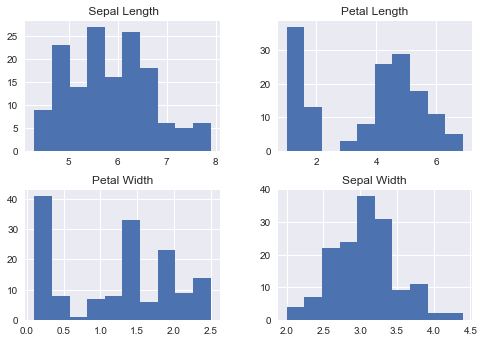

In [9]:
# histograms
data.hist()
plt.show()

Now you can also look at the interactions between the variables.

** Also check out scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.**

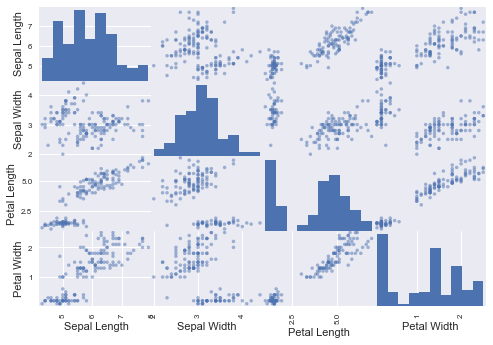

In [10]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

The diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship. If you take a good look at each pair you'll discover that these pairs have close relations especially petal width and petal length, also petal length and sepal length amongst others. Take a  look at another visual diagonal relationship using heatmap

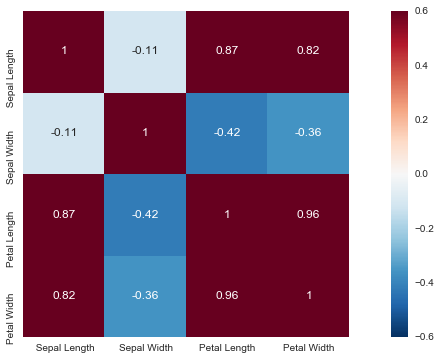

In [11]:
plt.figure(figsize=(15, 6))
seaborn.heatmap(data.corr(), vmax=0.6, square=True, annot=True)
plt.show()

You can  see the that sepal length is strongly correlated to petal length, petal width. Petal wiidth is strongly correlated to petal length and sepal length. This information has given us some insights. **(Note:  1 means perfectly positively correlated, and -1 means perfectly negatively correlated. Negative values are negative correlations while positive values are positive correlations)**


### Building Model

Now to seperating the independent features from the dependent feature. Seperating our independent feature from dependent features gives our model the edge to differentiate between the dependent and independent features and what distinct operation should be carried out on each

In [12]:
# making our matrix and vector
X = data.iloc[:, :-1].values #matrix (independent feature)
y = data.iloc[:, 4].values #vector (dependent feature)

By doing this you'll have your independent feature  to be in matrix format while your dependent feature will be a vector

In [13]:
X

array([[ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4.8,  3.1,  1.6,  0.2],
       [ 5

In [14]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       '

Since the target feature is categorical, you need to encode it using the `LabelEncoder` package in sklearn. This converts each category into numbers. **Note** : If the categories are just two we could use the `binarize` package in sklearn, which converts each category into 0 and 1. You import it by calling `from sklearn.preprocessing import binarize`

In [15]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0], dtype=int64)

Good enough you have them converted into numbers. Thanks to **LabelEncoder!**  You can deduce by comparing the two vectors **y**, before encoding and after encoding that: *0, 1 and 2 stand for Iris-setosa, Iris-versicolor and Iris-Virginica respectively*

Move on to Splitting the dataset into train and test sets. **Train** is going to be the dataset your model will learn from while **Test** is the model you'll use for validation. You split your dataset because it is not advisable to test your model with the same dataset because your model can memorize and give verbatim results hence the aim of machine learning is not achieved, which is training models to learn via algorithms and not just memorize. Test size is chosen to be 20%(0.2). That automatically makes your train size 80%. It's best that more percentage should go to training than testing so as to provide the model with enough information

In [16]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
y_train

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2,
       0, 0, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0,
       0, 2, 1, 2, 0], dtype=int64)

In [18]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0], dtype=int64)

Append all your algorithms into a list. This will enable you to loop through it and check for their accuracy

In [19]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Now you loop through the list **model** and calculate the accuracy for individual algorithms.

In [26]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=7)
 cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.941667 (0.053359)
KNN: 0.966667 (0.040825)
CART: 0.933333 (0.050000)
NB: 0.958333 (0.041667)
SVM: 0.983333 (0.033333)


Here you go. The results for the algorithms. SVM has the highest accuracy  with 0.983333 and both LR and CART have the lowest 0.941667. KNN has 0.966667(That's fair enough).
According to best practice, it's advisable to choose the the algorithm with the best accuracy to have a better model but considering the fact that our target feature is categorical, hence it is advisable to make predictions with a classification algorithm such as KNN.


### Making Predictions (Implementation of KNN )

In [21]:
#from the above output  knn has 0.966667 cv_results mean and 0.40 std
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions)) 

0.933333333333


The set of labels predicted matches the corresponding set of labels in y_test with 93.33% accuracy

In [31]:
print(confusion_matrix(y_test, predictions))


[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]


Confusion matrix table here shows that the whole Iris-setosa and Iris-vesicolor got predicted accurately; the first and second column stand for  Iris-setosa and Iris-vesicolor respectively. While Iris-virginica being the last column got predicted wrongly for two observations. Which shows our model has high tendency of predicting  Iris-setosa and Iris-vesicolor accurately. Though the chances of predicting Iris-virginica accurately are not low but not as accurate as for both  Iris-setosa and Iris-vesicolor. Read more on confusion matrix [here](https://en.wikipedia.org/wiki/Confusion_matrix)

In [23]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.85      0.92        13
          2       0.75      1.00      0.86         6

avg / total       0.95      0.93      0.94        30



The classification report has category(which is unlabeled), precision, recall, f1-score and support columns respectively. 
- The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of true positives and ``fp`` the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1.00 and the worst value is 0.00. Both 0 and 1 (i.e  Iris-setosa and Iris-vesicolor) on the category column have 1.00 as their precision while 2( i.e Iris-Virginica) has 0.75. With an average of 0.95 for precision column.
- The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of true positives and ``fn`` the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1.00 and the worst value is 0.00. Both 0 and 2 on the category column have 1.00 as their recall score while 1(on the category column) has 0.85 as its recall score. With an average of 0.93 for the recall column.
- The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1.00 and worst score at 0.00. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: `F1 = 2 * (precision * recall) / (precision + recall)` . In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. 0, 1 and 2 (on the category column) have 1.00, 0.92 and 0.86 has their F1-score respectively. With an average of 0.94 for the F1-score column

- Supports stands for the number of observations predicted into that class. 0, 1 and 2  have 11, 13 and 6 respectively. With a total of 30 predictions summed up from classes 0, 1 and 2 ( Iris-setosa and Iris-vesicolor, and Iris-Virginica respectively)

Now check out the prediction made by your model

In [24]:
predictions


array([2, 1, 0, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0], dtype=int64)

and compare with the original value in **y_test**

In [25]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0], dtype=int64)

If you compare **predictions** and **y_test** you'll see that only four values out 30 are incorrect and yes you just used KNN to make prediction on the Iris Dataset.

### Conclusion

Congratualtions, you just made a prediction with KNN. You can go through this tutorial over again if it looks clumsy or you didn't get the concept at your first reading attempt. But remember (consistent) practice and use of knowledge is very vital in Data Science and Machine Learning. In case you have questions on this article or related concepts you can contact me on twitter [@elseagle](http://twitter.com/elseagle). Thank you for reading.